# Code to create violin plots for HRApop validations 

## Import statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

## Global variables

In [2]:
hra_pop_version = "0.8.3"

## Import the data

In [23]:
validation_data = pd.read_csv(filepath_or_buffer=f"../../hra-pop/output-data/v{hra_pop_version}/reports/atlas/validation-v2p1.csv")

## Functions for formatting and plotting

In [26]:
# Define a function to format tick labels
def format_ticks(x):
  """
  Takes a number and returns it with one decimal

  Args:
  x (float): a number

  Returns:
  float: the number with one decimal
  """
  return '{:.1f}'.format(x)

def plot(tool):
  """
  Creates a violin plot for one tool only

  Args:
  tool (string): a cell type annotation tool
  """
  for_plot = validation_data[(validation_data.as_tool == tool) & (validation_data.tool ==tool)]
  violin = sns.violinplot(data=for_plot, x="as_label", y="similarity", density_norm="area", cut=0, inner="box", hue="as_in_collisions", split=True)
  set_theme(violin=violin)

def set_theme(violin):
  """
  Takes a plot and adds a theme

  Args:
  violin (sns plot): a violin plot
  """
  violin = violin
  plt.xticks(rotation=90)
  sns.set_theme(rc={'figure.figsize':(40,15)})
  
  #  change the axis labels
  violin.set_xlabel("Anatomical Structure", fontsize=30)
  violin.set_ylabel("Weighted Cosine Similarity", fontsize=30)

  # get the Axes object of the current plot
  ax = plt.gca()

  # Change the size of the x-axis tick labels
  ax.tick_params(axis='x', labelsize=25)
  ax.tick_params(axis='y', labelsize=25)
  plt.legend(title="Does dataset actually collide with\n anatomical structure?", loc="best")
  plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
  plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title 


### Azimuth

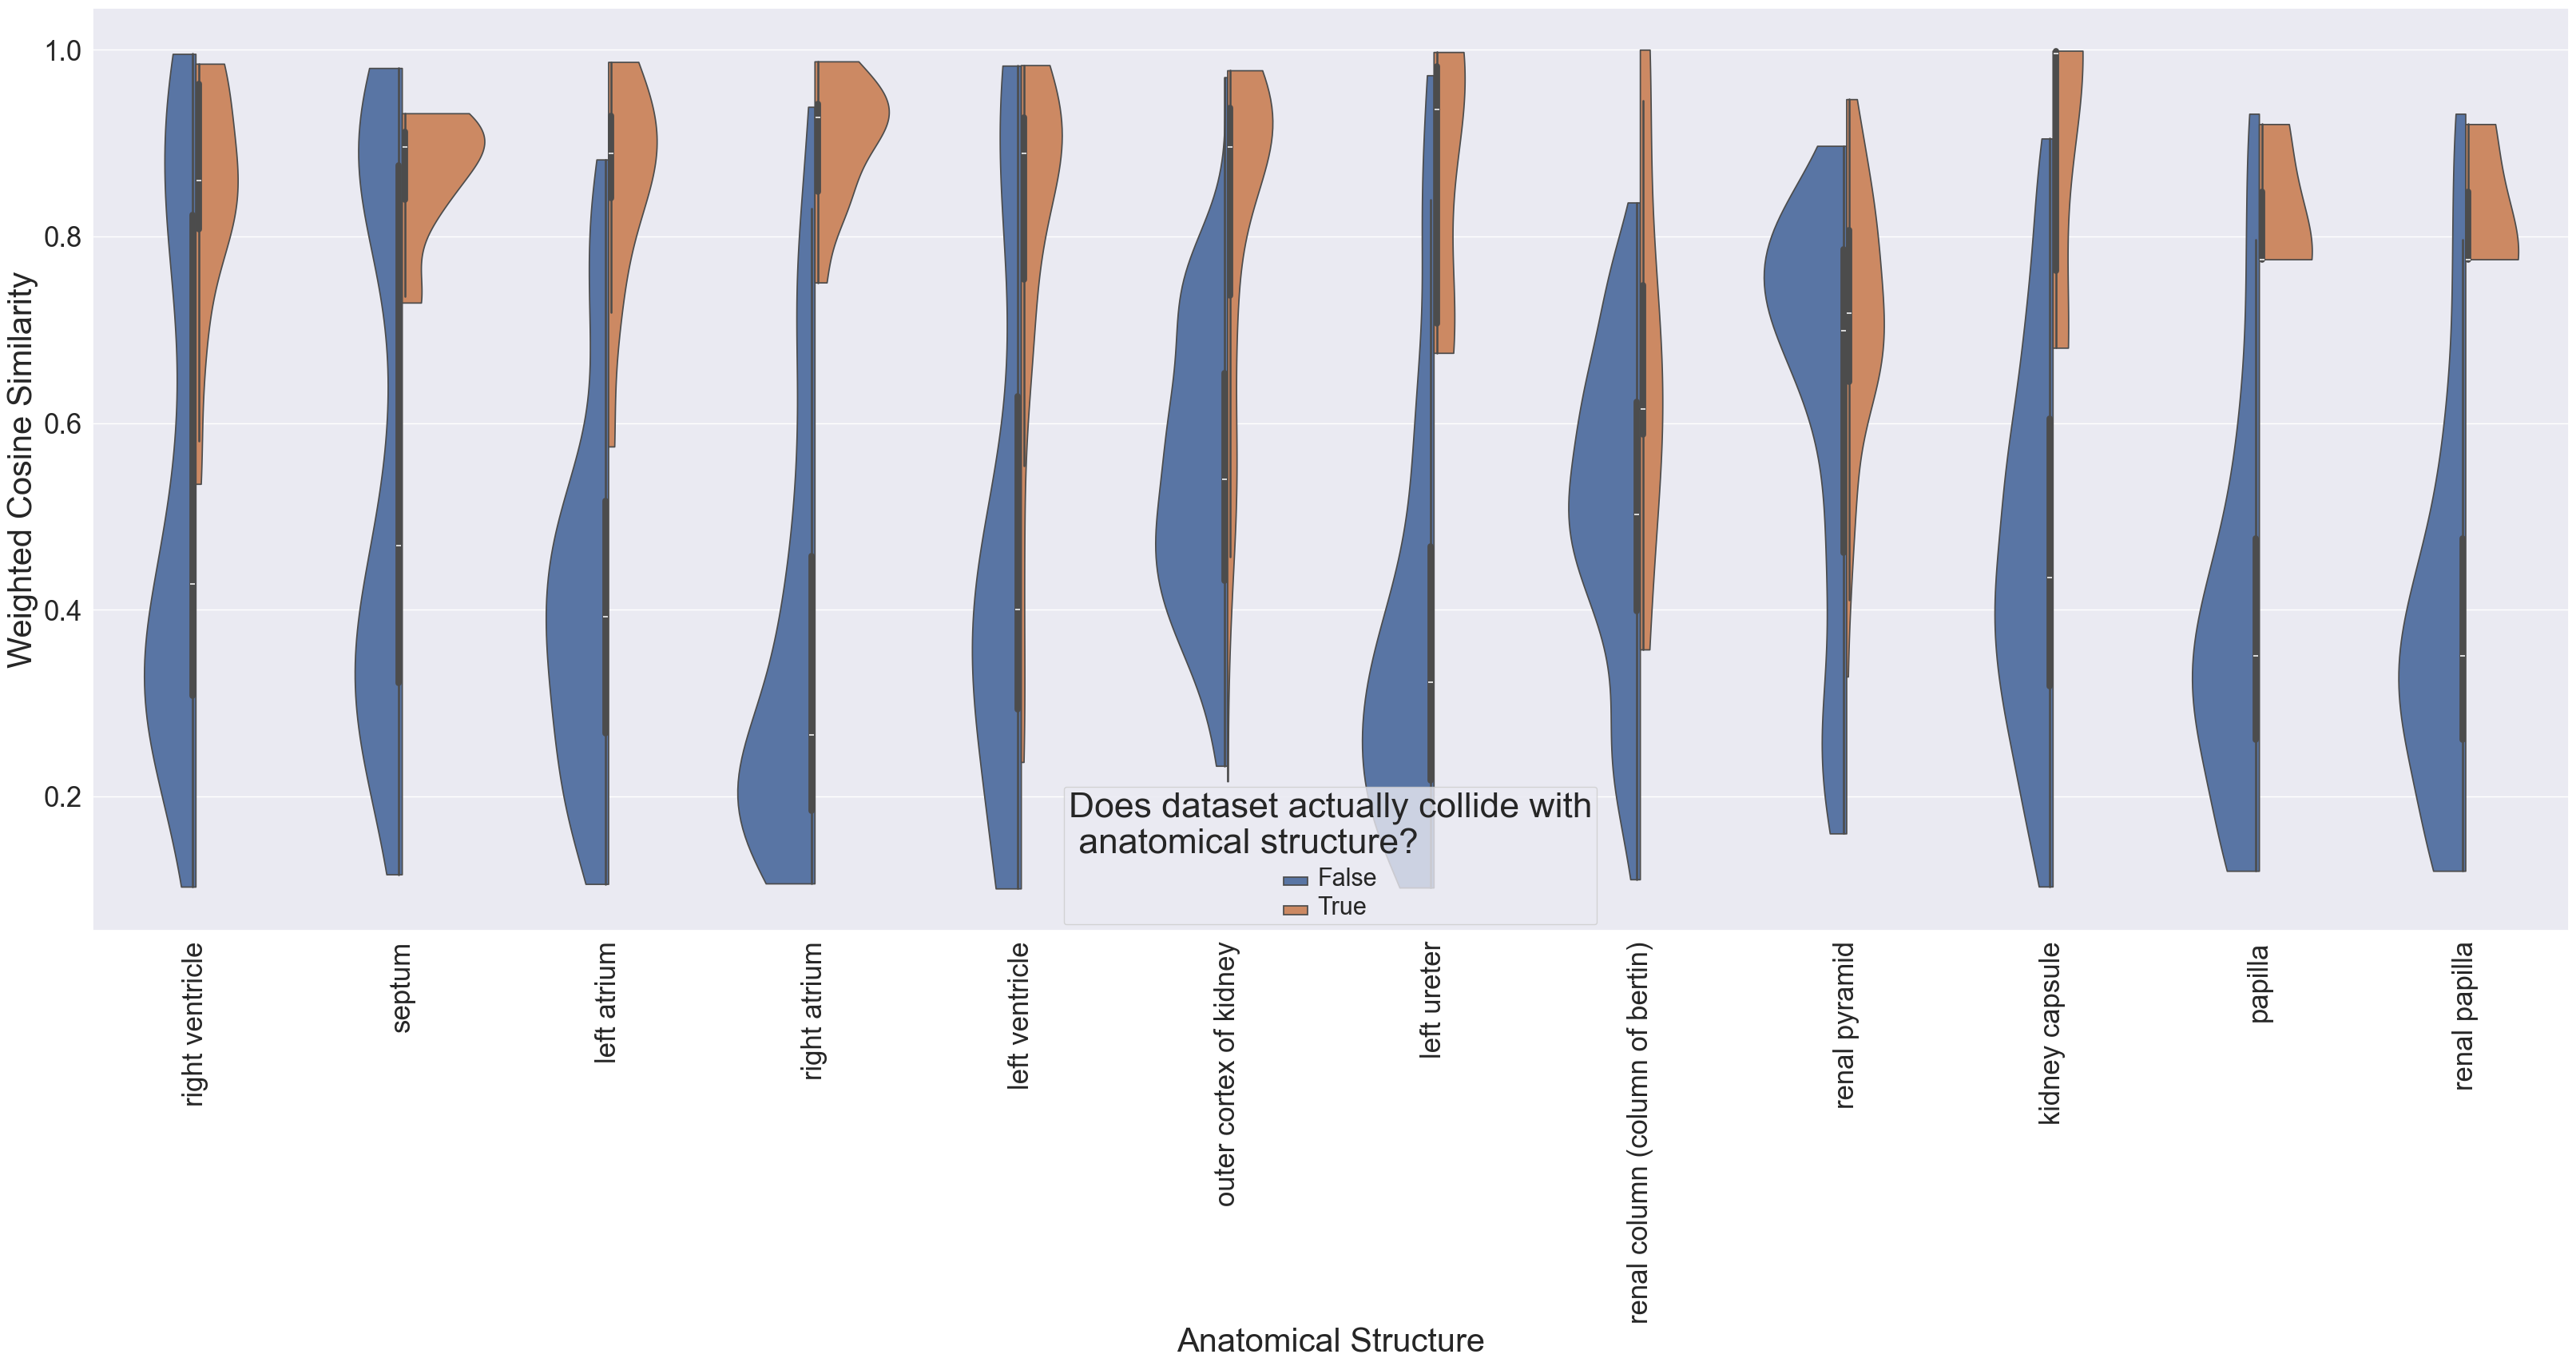

In [27]:
plot("azimuth")

### CellTypist

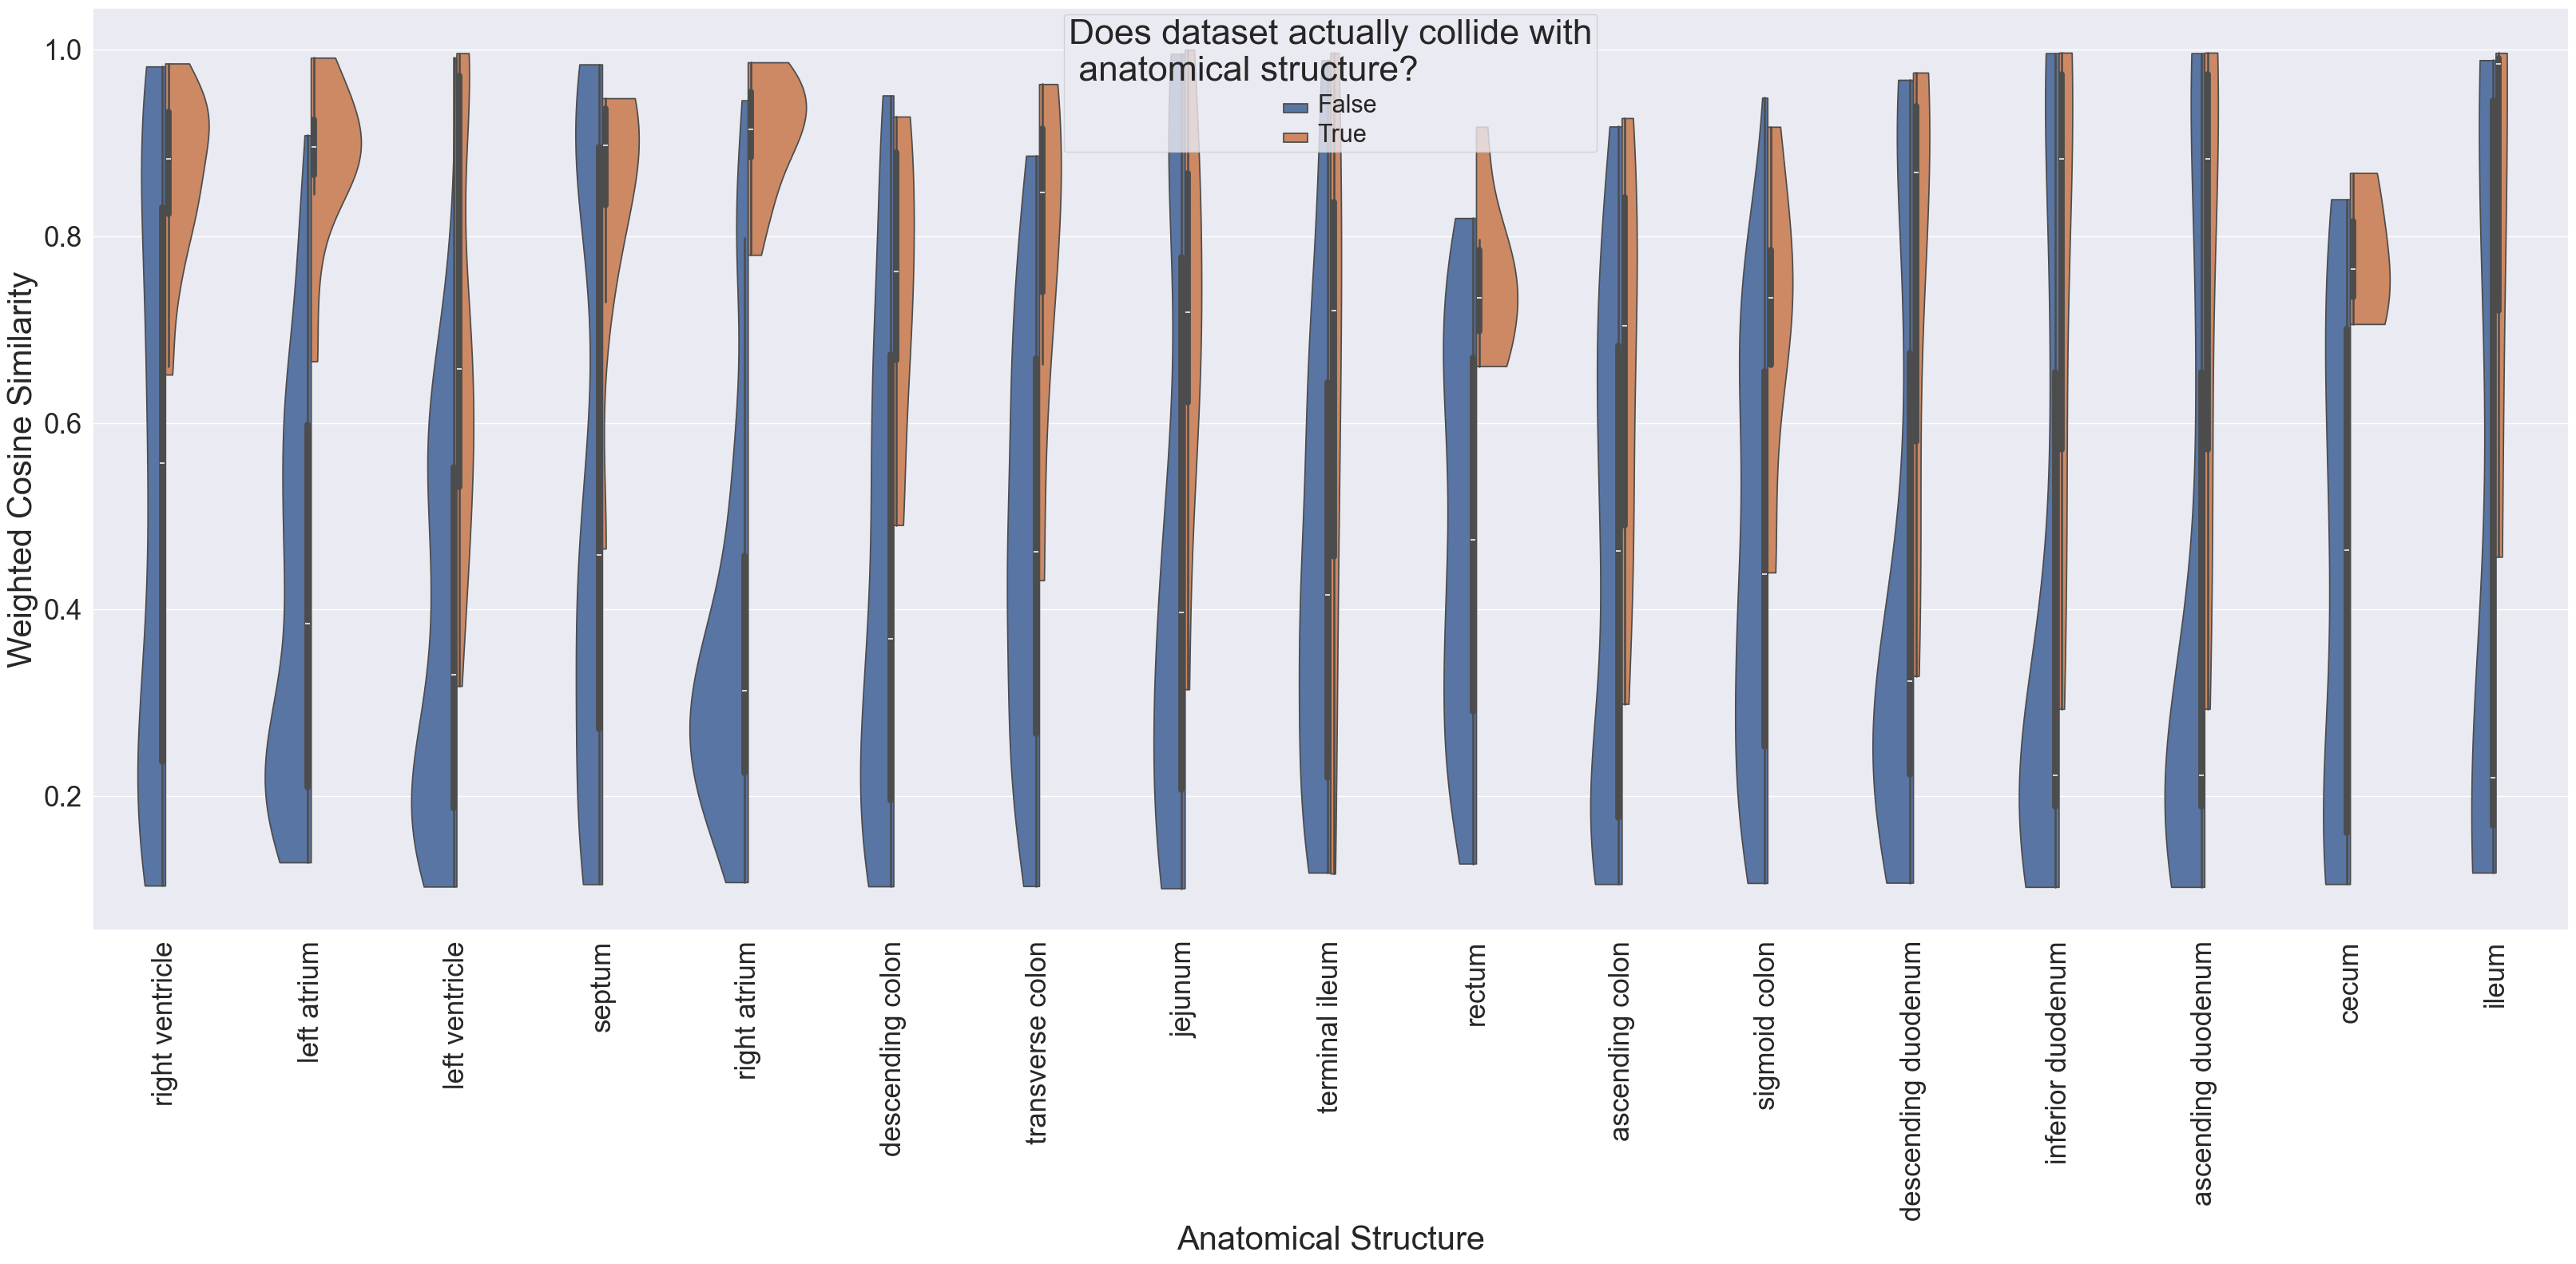

In [28]:
plot("celltypist")

### popV

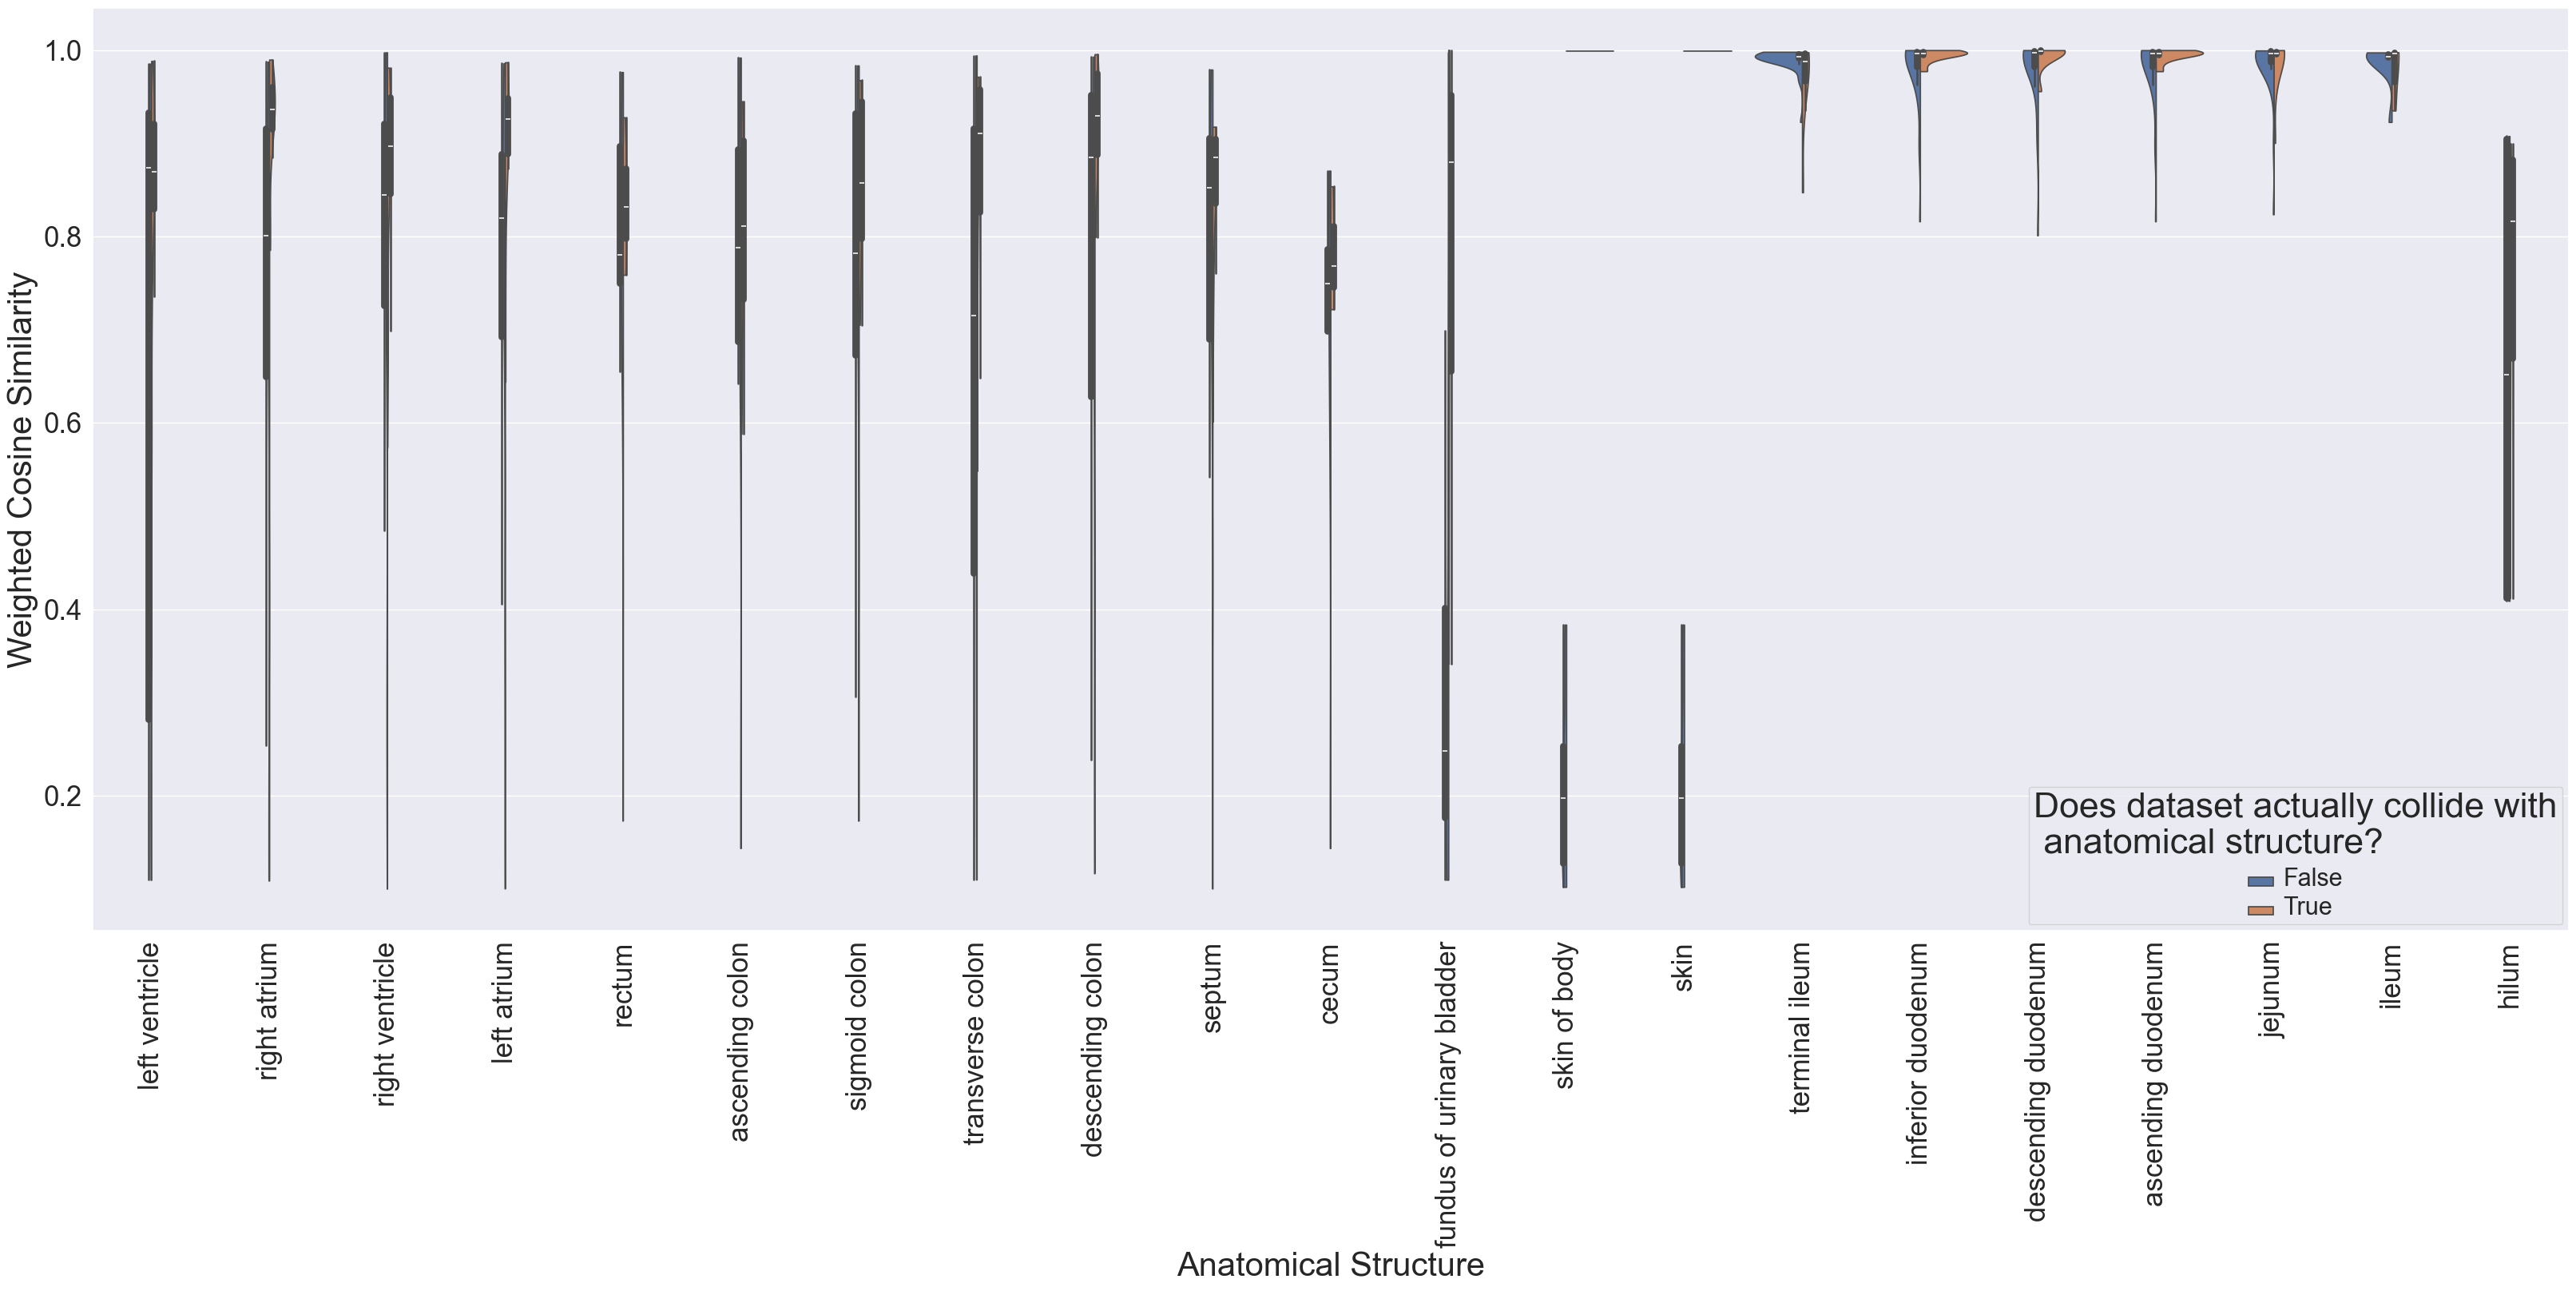

In [29]:
plot("popv")

## Report numbers for violin plots (right atrium)

In [25]:
# validation_data[validation_data.as_label == "right atrium"]
validation_data

# check hilum...?

,sex,sample,dataset,tool,modality,organ,organId,as_label,as,as_tool,similarity,as_in_collisions
0,Male,https://api.cellxgene.cziscience.com/dp/v1/col...,https://api.cellxgene.cziscience.com/dp/v1/col...,popv,sc_transcriptomics,respiratory system,UBERON:0001004,left ventricle,http://purl.obolibrary.org/obo/UBERON_0002084,azimuth,0.260581,False
1,Male,https://api.cellxgene.cziscience.com/dp/v1/col...,https://api.cellxgene.cziscience.com/dp/v1/col...,popv,sc_transcriptomics,respiratory system,UBERON:0001004,left ventricle,http://purl.obolibrary.org/obo/UBERON_0002084,popv,0.151269,False
2,Male,https://api.cellxgene.cziscience.com/dp/v1/col...,https://api.cellxgene.cziscience.com/dp/v1/col...,popv,sc_transcriptomics,respiratory system,UBERON:0001004,left ventricle,http://purl.obolibrary.org/obo/UBERON_0002084,celltypist,0.177954,False
3,Male,https://api.cellxgene.cziscience.com/dp/v1/col...,https://api.cellxgene.cziscience.com/dp/v1/col...,popv,sc_transcriptomics,respiratory system,UBERON:0001004,right atrium,http://purl.obolibrary.org/obo/UBERON_0002078,celltypist,0.363804,False
4,Male,https://api.cellxgene.cziscience.com/dp/v1/col...,https://api.cellxgene.cziscience.com/dp/v1/col...,popv,sc_transcriptomics,respiratory system,UBERON:0001004,right atrium,http://purl.obolibrary.org/obo/UBERON_0002078,azimuth,0.337425,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7473,Male,https://entity.api.sennetconsortium.org/entiti...,https://entity.api.sennetconsortium.org/entiti...,celltypist,sc_transcriptomics,liver,UBERON:0002107,right atrium,http://purl.obolibrary.org/obo/UBERON_0002078,celltypist,0.219694,False
7474,Male,https://entity.api.sennetconsortium.org/entiti...,https://entity.api.sennetconsortium.org/entiti...,celltypist,sc_transcriptomics,liver,UBERON:0002107,right atrium,http://purl.obolibrary.org/obo/UBERON_0002078,azimuth,0.234599,False
7475,Male,https://entity.api.sennetconsortium.org/entiti...,https://entity.api.sennetconsortium.org/entiti...,celltypist,sc_transcriptomics,liver,UBERON:0002107,left atrium,http://purl.obolibrary.org/obo/UBERON_0002079,popv,0.106374,False
7476,Male,https://entity.api.sennetconsortium.org/entiti...,https://entity.api.sennetconsortium.org/entiti...,celltypist,sc_transcriptomics,liver,UBERON:0002107,left atrium,http://purl.obolibrary.org/obo/UBERON_0002079,celltypist,0.201236,False
